<a href="https://colab.research.google.com/github/shubhro-jyoti/Yes-bank-stock-closing-price-prediction./blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem statement:** The problem statement is to predict the stock closing price of yes bank.

In [48]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score , mean_squared_error ,mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/ML project/data_YesBank_StockPrices.csv')

### **Data Inspection**

In [4]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


we can see that there are no nullvalues and the datatypes are correct as per the columns.

In [9]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
def changedate(date):
  
  date_dict={'Jan':'January','Feb':'Feburary','Mar':'March','Apr':'April','May':'May','Jun':'June','Jul':'July','Aug':'August','Sep':'September','Oct':'October','Nov':'November','Dec':'December'}
  x=date[:-3]
  y=date_dict.get(x)
  return y

In [12]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### **Dataset information**

There are four given columns:
1. Date: contains the monthly date from July 2005 till November 2020 (Categorical)
2. Open: It is the opening price of the given stock (Numeric)
3. Close: It is the closing price of the given stock (Numeric)
4. High: It is the highest price of the stock monthly (Numeric)
5. Low: It is the lowest price of the stock monthly (Numeric)
6. Close: It is the closing price of the given stock (Numeric)

Here, the dependent variable is Closing price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


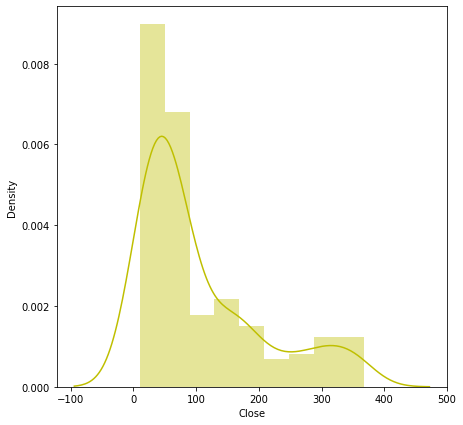

In [13]:
# let us now check the distribution of dependent variable
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


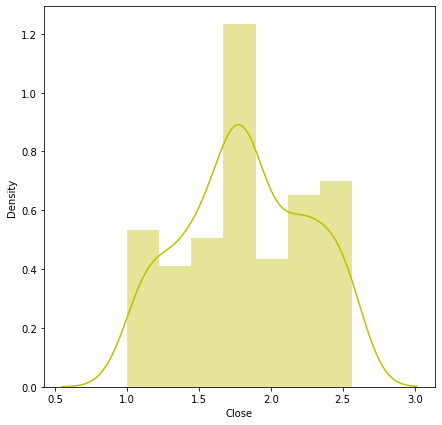

In [14]:
# applying log to dependent variable
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

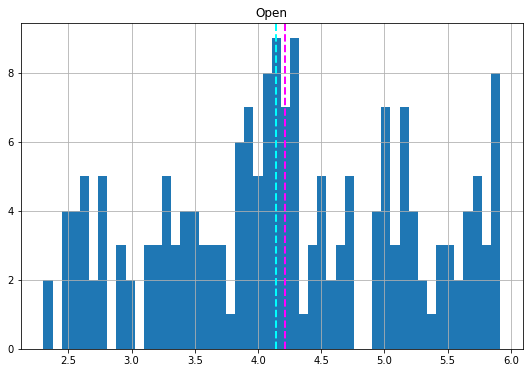

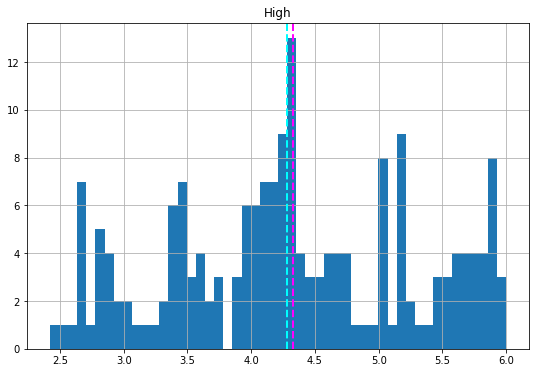

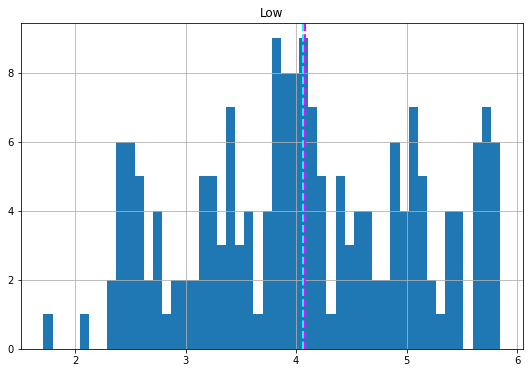

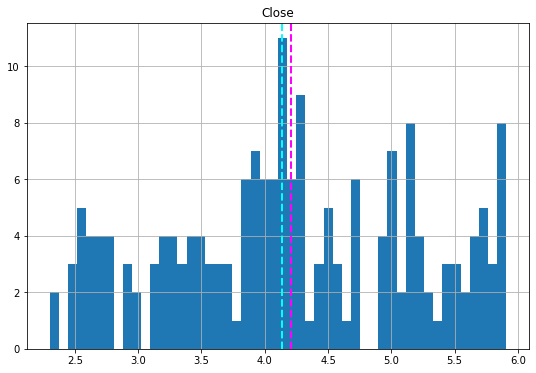

In [15]:
# plotting bar graph for all numeric features
numeric_features = df.columns

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [16]:

# creating dataframe for monthly close price
date_close=pd.DataFrame(list(zip(df['Date'],df['Close']))).rename(columns = {0:'Date', 1:'Close price'})
date_close

,Date,Close price
0,Jul-05,12.46
1,Aug-05,13.42
2,Sep-05,13.30
3,Oct-05,12.99
4,Nov-05,13.41
...,...,...
180,Jul-20,11.95
181,Aug-20,14.37
182,Sep-20,13.15
183,Oct-20,12.42


Text(0.5, 1.0, 'Close price history')

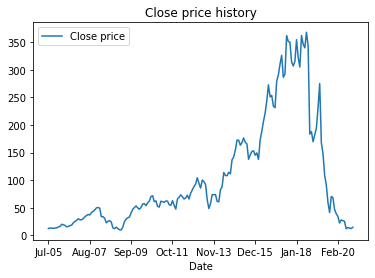

In [17]:
# visualising the closing price history
date_close.plot(x = 'Date', y = 'Close price')
plt.title('Close price history')

In [18]:
#defining ATR period
atr_period = 14

#calculating the range of each candle
df['range'] = df['High'] - df['Low']

#calculating the average value of the ranges 
df['atr_14'] = df['range'].rolling(atr_period).mean()

#plotting the ATR indicator
fig_atr = px.line(df,y='atr_14',title= 'ATR Indicator')
display(fig_atr)

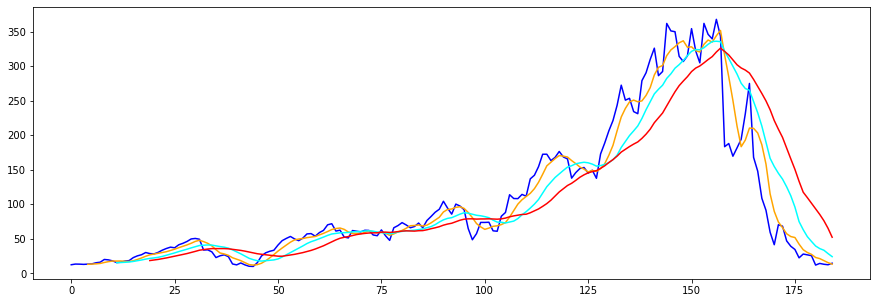

       Date   Open   High    Low  Close  range     atr_14   sma_5     sma_12  \
0    Jul-05  13.00  14.00  11.25  12.46   2.75        NaN     NaN        NaN   
1    Aug-05  12.58  14.88  12.55  13.42   2.33        NaN     NaN        NaN   
2    Sep-05  13.48  14.87  12.27  13.30   2.60        NaN     NaN        NaN   
3    Oct-05  13.20  14.47  12.40  12.99   2.07        NaN     NaN        NaN   
4    Nov-05  13.35  13.88  12.88  13.41   1.00        NaN  13.116        NaN   
..      ...    ...    ...    ...    ...    ...        ...     ...        ...   
180  Jul-20  25.60  28.30  11.10  11.95  17.20  27.796429  22.960  39.600000   
181  Aug-20  12.00  17.16  11.85  14.37   5.31  24.243571  21.344  35.839167   
182  Sep-20  14.30  15.34  12.75  13.15   2.59  22.367857  18.384  33.480833   
183  Oct-20  13.30  14.01  12.11  12.42   1.90  19.700000  15.498  28.645000   
184  Nov-20  12.41  14.90  12.21  14.67   2.69  17.635000  13.312  24.175833   

      sma_20  
0        NaN  
1        

In [19]:
#making columns of different possible moving averages
df['sma_5'] = df['Close'].rolling(5).mean()
df['sma_12'] = df['Close'].rolling(12).mean()
df['sma_20'] = df['Close'].rolling(20).mean()

#Visualizing with different moving averages
plt.figure(figsize=(15,5))
plt.plot(df['Close'],color='blue')
plt.plot(df['sma_5'],color='orange')
plt.plot(df['sma_12'],color='cyan')
plt.plot(df['sma_20'],color='red')
plt.show()
print(df)

In [20]:
#checking for null values
df.isna()

,Date,Open,High,Low,Close,range,atr_14,sma_5,sma_12,sma_20
0,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...
180,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False
182,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False


In [21]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'range', 'atr_14', 'sma_5',
       'sma_12', 'sma_20'],
      dtype='object')

In [29]:
feature = df.describe()
for item in feature:
  df[item].fillna(df[item].mean(),inplace = True)
df

,Date,Open,High,Low,Close,range,atr_14,sma_5,sma_12,sma_20
0,Jul-05,13.00,14.00,11.25,12.46,2.75,22.241624,107.235414,110.846370,114.70141
1,Aug-05,12.58,14.88,12.55,13.42,2.33,22.241624,107.235414,110.846370,114.70141
2,Sep-05,13.48,14.87,12.27,13.30,2.60,22.241624,107.235414,110.846370,114.70141
3,Oct-05,13.20,14.47,12.40,12.99,2.07,22.241624,107.235414,110.846370,114.70141
4,Nov-05,13.35,13.88,12.88,13.41,1.00,22.241624,13.116000,110.846370,114.70141
...,...,...,...,...,...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95,17.20,27.796429,22.960000,39.600000,93.67250
181,Aug-20,12.00,17.16,11.85,14.37,5.31,24.243571,21.344000,35.839167,85.30350
182,Sep-20,14.30,15.34,12.75,13.15,2.59,22.367857,18.384000,33.480833,76.24600
183,Oct-20,13.30,14.01,12.11,12.42,1.90,19.700000,15.498000,28.645000,65.30700


In [23]:
# defining a function to check how much accurate is our model and will it be making or loosing money if we traded according to this
def backtest(opens, closes, preds, start = 1000,threshold = 0):
  account = start  # starting amount in the books
  changes = []     # array of how much the price is changing 

  for i in range(len(preds)):
    if (preds[i]-opens[i])/opens[i] >=threshold:   # we will only make trades if the predicted change is greater than or equal to our threshold change
      account += account*(closes[i]-opens[i])/opens[i]  # amount will be changed simultaneously as we go along and make trades
    changes.append(account)                            # with each trade with either loss or profit the initial principle will change      
  changes = np.array(changes)                          # converting changes to an array
  percent_changed = ((account-start)/start)*100
  print(f'Net Change percentage : {percent_changed}%')

  plt.plot(range(len(changes)),changes)                # plotting the changes in our book
  plt.show()

In [35]:
# defining dependent variable
y = df['Close']
# defining independent variables
dependent = ['Open','High','Low','range','atr_14','sma_5','sma_12','sma_20']
x = df[dependent]

In [36]:
# splitting the data
num = 56
x_train = x[:-1*num]
y_train = y[:-1*num]
x_test = x[-1*num:]
y_test = y[-1*num:]

here we can't use the train_test_split as it chooses data randomly which is not encouraged in real life scenario of stock close price prediction.

In [38]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(129, 8) (129,) (56, 8) (56,)


### ***Linear Regression***

In [46]:
model = LinearRegression()
model = model.fit(x_train,y_train)
y_preds = model.predict(x_test)

In [40]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.994104652180944
0.9832771527719797


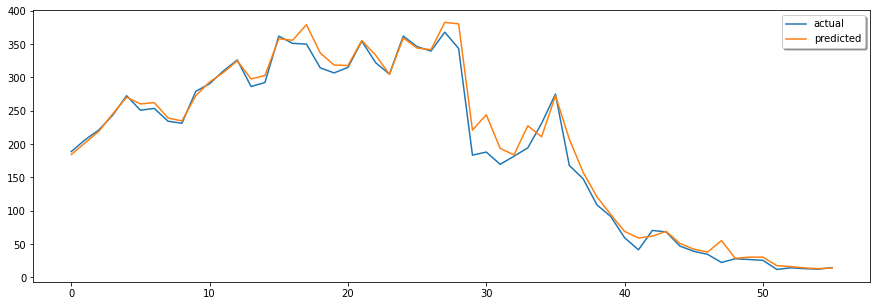

In [51]:
# Comparing predicted price with the actual price
plt.figure(figsize=(15,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="actual")
plt.plot(x_ax, y_preds, label="predicted")
plt.legend(loc='best',fancybox=True, shadow=True)

the predicted values are somewhat close to the actual values.

In [ ]:
# checking if we made trade
backtest(np.array(x_test).T[0],y_test,y_preds,1000,0)